In [1]:
### 1 K-means Clustering ###
"""
The K-means algorithm is a method to automatically cluster similar data examples together.
There are two main steps in the K-means algorithm:
1. cluster assignment step: Assign each data point to the closest centroid.
2. move centroid step: Compute means based on centroid
"""
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.io # load .mat file 
from sklearn.cluster import KMeans 

In [2]:
### 1.1 Implementing K-means ###
file_location = 'ex7/ex7data2'
data = scipy.io.loadmat(file_location)
X = data['X']
X[:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

In [3]:
### 1.1.1 Finding closest centroids ###
"""
In the “cluster assignment” phase of the K-means algorithm, 
the algorithm assigns every training example x(i) to its closest centroid, given the current positions of centroids.
    
    c(i) := j that minimizes ||x(i) − μ_j||**2

"""
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        minval = math.inf
        for j in range(K):
            this = sum((X[i,:] - centroids[j,:])**2)
            if this < minval:
                minval = min(minval,this)
                c = j 
        idx[i] = c
    return idx

K = 3 # 3 Centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
idx[:3] # [1,3,2] in MATLAB == [0,1,2] in Python 

array([[0.],
       [2.],
       [1.]])

In [4]:
### 1.1.2 Computing centroid means ###
"""
The second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. 
"""
def computeCentroids(X, idx, K):
    m,n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        pos = (idx==i).flatten()
        centroids[i,:] = X[pos,:].mean(axis=0)
    return centroids

centroids = computeCentroids(X, idx, K)
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [5]:
### 1.2 K-means on example dataset ###
# load file and take a look
file_location = 'ex7/ex7data2'
data = scipy.io.loadmat(file_location)
X = data['X']
X[:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

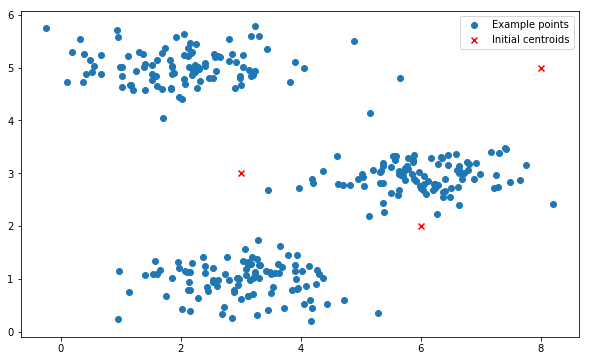

In [6]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], label='Example points')
plt.scatter(initial_centroids[:,0], initial_centroids[:,1], marker='x', c='r', label='Initial centroids')
plt.legend(loc='best')
plt.show()

In [7]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    #Initialize values
    m,n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))
    # Run K-Means
    for i in range(1,max_iters+1):
        idx = findClosestCentroids(X, centroids) # For each example in X, assign it to the closest centroid
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
            previous_centroids = centroids;
        centroids = computeCentroids(X, idx, K)
    return centroids, idx 


def plotDataPoints(X, idx, K, i):
    idx = idx.flatten() # to fit the format of c in plt.scatter 
    #plt.figure(figsize=(9,5)) # remove the hashtag to see the process that colors change
    plt.scatter(X[:,0], X[:,1], c=idx, cmap=plt.cm.brg)
    plt.title('Iteration number %d'%i)
    

# Draws a line from point p1 to point p2
def drawLine(p1, p2):
    plt.plot([p1[0],p2[0]], [p1[1],p2[1]],'k')
    
    
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    plotDataPoints(X, idx, K, i)
    plt.plot(centroids[:,0], centroids[:,1], 'kx', markersize=10, linewidth=3)
    for j in range(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :])
    return None

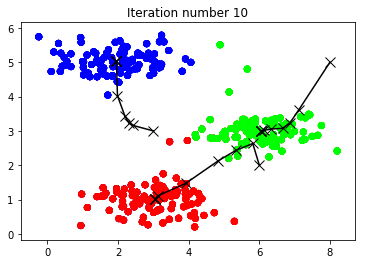

In [8]:
K = 3
max_iters = 10
initial_centroids = np.array([[3,3],[6,2],[8,5]])
centroids, idx  = runkMeans(X, initial_centroids, max_iters, plot_progress=True)

In [9]:
# use sklearn 
model = KMeans(3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

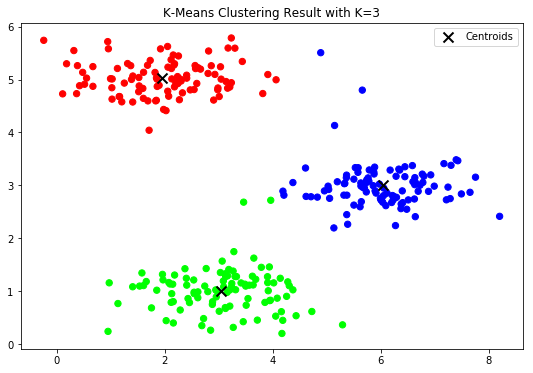

In [10]:
plt.figure(figsize=(9,6))
plt.scatter(X[:,0], X[:,1], s=40, c=model.labels_,
            cmap=plt.cm.brg) # https://matplotlib.org/examples/color/colormaps_reference.html            
plt.title('K-Means Clustering Result with K=3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 
            marker='x', s=100, c='k', linewidth=2, label='Centroids')
plt.legend(loc='best')
plt.show()

In [11]:
### 1.3 Random initialization ###
def kMeansInitCentroids(X, K):
    randidxs= np.arange(X.shape[0])
    np.random.shuffle(randidxs)
    centroids = X[randidxs[:K],:]
    return centroids

a = np.array([[1,2],[3,4],[5,6],[7,8],[9,10]])
kMeansInitCentroids(a,3)

array([[ 9, 10],
       [ 1,  2],
       [ 7,  8]])

The shape of A is (128, 128, 3)


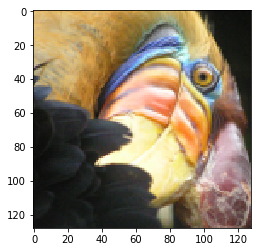

In [12]:
### 1.4 Image compression with K-means ###
img = plt.imread('ex7/bird_small.png')
A = img / 255; # Divide by 255 so that all values are in the range 0 - 1
print('The shape of A is', A.shape)
plt.imshow(img)
plt.show()

In [13]:
A = A.reshape(A.shape[0]*A.shape[1], 3)
A.shape

(16384, 3)

In [14]:
# Use runkMeans 
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(A, K);
centroids, idx = runkMeans(A, initial_centroids, max_iters)

In [15]:
# recover the image from the indices (idx) by mapping each pixel to the centroid value
idx = findClosestCentroids(A, centroids) 
idx = idx.astype(int).flatten()
A_recovered = centroids[idx,:]
A_recovered = A_recovered.reshape(img.shape[0], img.shape[1], 3)

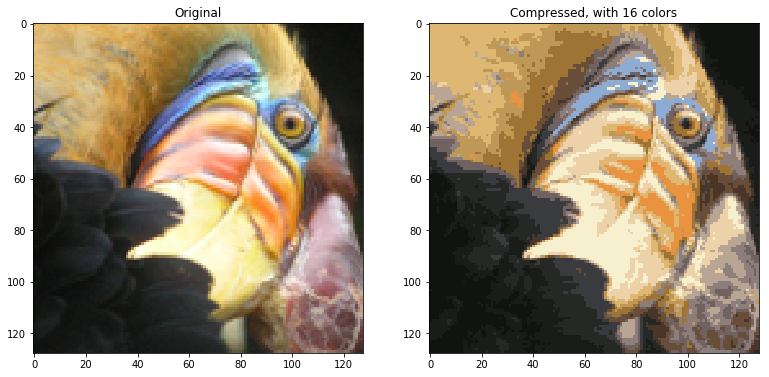

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(A_recovered*255)
ax2.set_title('Compressed, with 16 colors')
plt.show()

In [17]:
# use sklearn 
model = KMeans(16)
model.fit(A)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
A_recovered = model.cluster_centers_[model.labels_].reshape(img.shape[0], img.shape[1], 3)

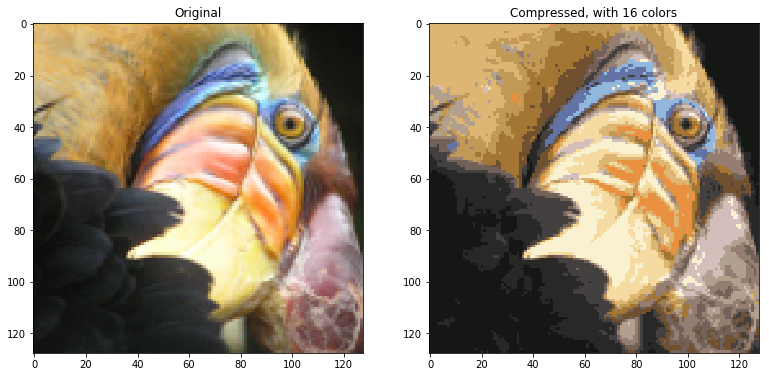

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(A_recovered*255)
ax2.set_title('Compressed, with 16 colors')
plt.show()

In [20]:
### 2 Principal Component Analysis ###
"""
We will use principal component analysis (PCA) to perform dimensionality reduction.
"""
from numpy.linalg import svd

In [21]:
### 2.1 Example Dataset ###
file_location = 'ex7/ex7data1'
data = scipy.io.loadmat(file_location)
X = data['X']
print(X[:5])

[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]]


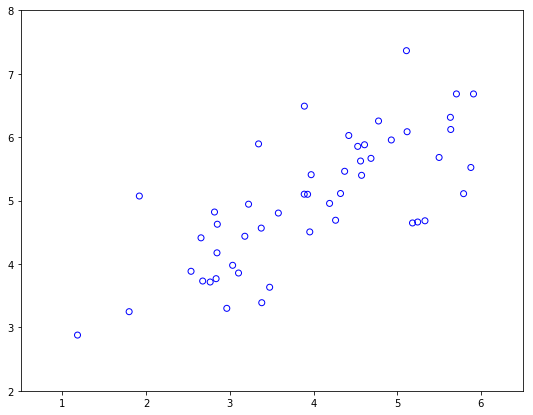

In [22]:
plt.figure(figsize=(9,7))
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')
plt.xlim((0.5,6.5))
plt.ylim((2,8))
plt.show()

In [23]:
### 2.2 Implementing PCA ###
"""
Before using PCA, 
it is important to firstly normalize the data by subtracting the mean value of each feature from the dataset, 
and scaling each dimension so that they are in the same range. 

PCA consists of two computational steps:
First, you compute the covariance matrix of the data.
Then, you use SVD function to compute the eigenvectors U1, U2, ..., Un. 
These will correspond to the principal components of variation in the data.
"""
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma


def pca(X_norm):
    m,n = X_norm.shape
    Sigma = X_norm.T.dot(X_norm)/m 
    U,S,V = svd(Sigma) 
    return U,S

# Linear Algebra:
# The SVD of A: A=U*S*V.T, then A.T*A=V*(S.T*S)*V.T (U is an orthogonal matrix, i.e., U.T*U=I)
# S_ii are singular values of A, then S.T*S_ii are eigenvalus of A.
# We know that the column vectors of V are eigenvectors of A.  
# i.e., U, which is derived by svd(Sigma), whose column vectors are eigenvectors of X_norm  
    

X_norm, mu, sigma = featureNormalize(X)
U,S = pca(X_norm)
print('eigenvectors \n',U)
print('\n top principal component (eigenvector)\n',U[:,0])
print('\n eigenvalues \n',S)

eigenvectors 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

 top principal component (eigenvector)
 [-0.70710678 -0.70710678]

 eigenvalues 
 [1.73553038 0.26446962]


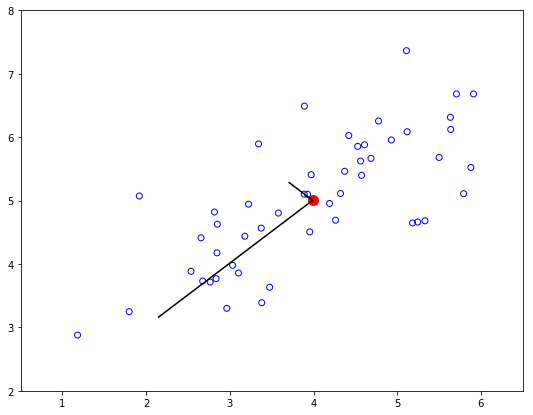

In [24]:
plt.figure(figsize=(9,7))
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')
plt.xlim((0.5,6.5))
plt.ylim((2,8))
drawLine(mu, mu + 1.5 * S[0] * U[:,0]) # top principal component (eigenvector), the longer one 
drawLine(mu, mu + 1.5 * S[1] * U[:,1])
plt.scatter(mu[0], mu[1], c='r', linewidths=5) # mu's location
plt.show()

In [25]:
### 2.3 Dimensionality Reduction with PCA ###
"""
In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, 
you could use the projected data instead of the original data. 
By using the projected data, you can train your model faster as there are less dimensions in the input.
"""
print(X_norm.shape)
print(U.shape)

(50, 2)
(2, 2)


In [26]:
### 2.3.1 Projecting the data onto the principal components ###
def projectData(X, U, K):
    U_reduce = U[:,:K]
    Z = X.dot(U_reduce)
    return Z

K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: \n', Z[0,0])
Z.shape

Projection of the first example: 
 1.4963126084578515


(50, 1)

In [27]:
### 2.3.2 Reconstructing an approximation of the data ###
def recoverData(Z, U, K):
    X_rec = Z.dot(U[:,:K].T)
    return X_rec

X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: \n', X_rec[0,0], X_rec[0,1])

Approximation of the first example: 
 -1.058052792215478 -1.0580527922154779


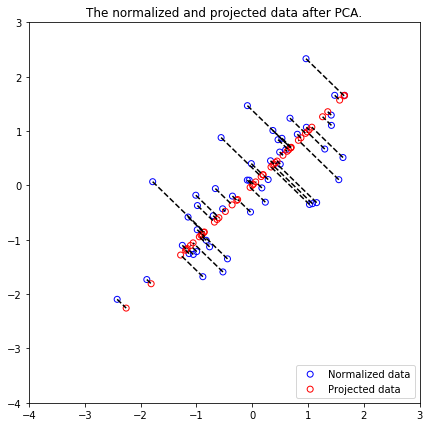

In [28]:
### 2.3.3 Visualizing the projections ###
plt.figure(figsize=(7,7))
plt.scatter(X_norm[:,0], X_norm[:,1], facecolors='none', edgecolors='b', label='Normalized data')
plt.scatter(X_rec[:,0], X_rec[:,1], facecolors='none', edgecolors='r', label='Projected data')
for i in range(X.shape[0]):
    plt.plot([X_norm[i,0], X_rec[i,0]],[X_norm[i,1], X_rec[i,1]], 'k--')
plt.xlim((-4,3))
plt.ylim((-4,3))
plt.title('The normalized and projected data after PCA.')
plt.legend(loc='lower right')
plt.show()


In [29]:
### 2.4 Face Image Dataset ###
file_location = 'ex7/ex7faces.mat'
data = scipy.io.loadmat(file_location)
X = data['X']
X.shape

(5000, 1024)

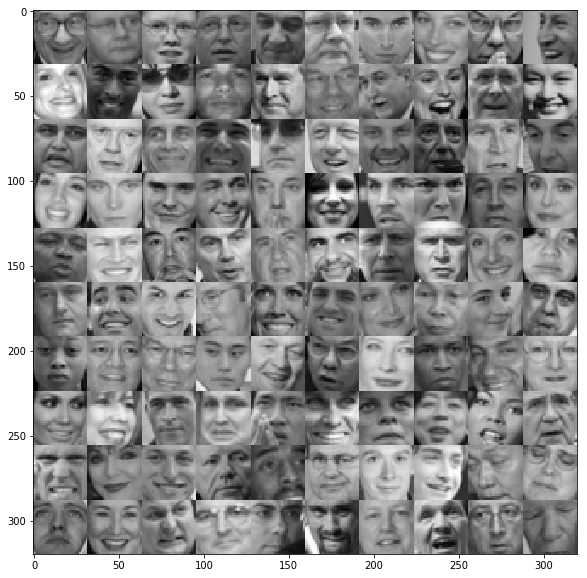

In [30]:
# visualize the first 100 of these face images 
def displayData(X,num):
    n = int(np.sqrt(num))
    plt.figure(figsize=(n,n))
    img = np.zeros((1,32*n)) # prevent np.append's ValueError: arrays must have same number of dimensions
    for i in range(n):
        x = X[i*n:(i+1)*n,:].reshape(32*n,32).T
        img = np.append(img, x, axis=0)

    img = img[1:,:] # choose what we need
    plt.imshow(img, cmap=plt.cm.gray)
    plt.show()

displayData(X,100)

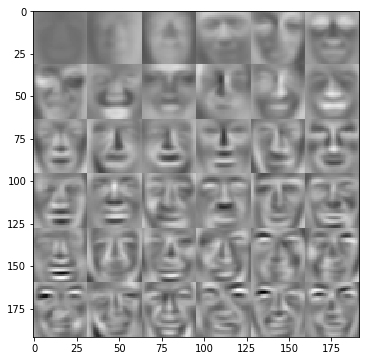

In [31]:
### 2.4.1 PCA on Faces ###
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

# the first 36 principal components that describe the largest variations
displayData(U[:,:36].T,36)

In [32]:
### 2.4.2 Dimensionality Reduction ###
"""
To reduce the dimension of the face dataset from 1024 to 100,
projecting the face dataset onto only the first 100 principal components.
"""
K = 100
Z = projectData(X_norm, U, K) # Now we can use Z to fit our learning algorithm. (Speed up!!)
Z.shape

(5000, 100)

In [33]:
# recover the data using only the projected dataset Z
K = 100;
X_rec  = recoverData(Z, U, K)

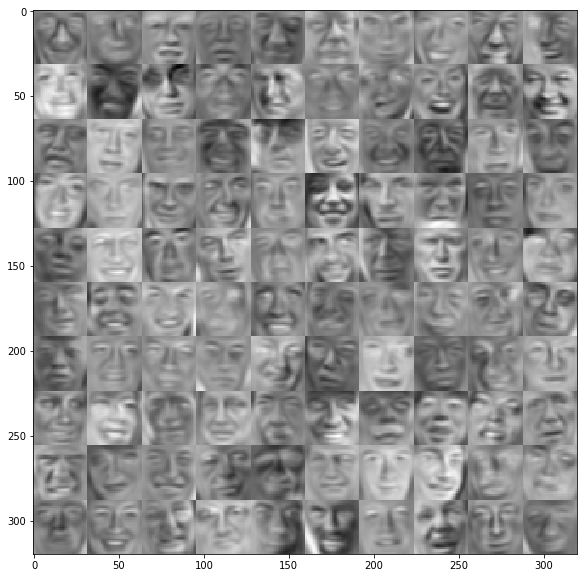

In [34]:
displayData(X_rec,100)

In [35]:
### 2.5 PCA for visualization ###
img = plt.imread('ex7/bird_small.png')
A = img / 255; # Divide by 255 so that all values are in the range 0 - 1
print('The shape of A is', A.shape)

The shape of A is (128, 128, 3)


In [36]:
A = A.reshape(A.shape[0]*A.shape[1], 3)
A.shape

(16384, 3)

In [37]:
K = 16; 
max_iters = 10;
initial_centroids = kMeansInitCentroids(A, K)
centroids, idx = runkMeans(A, initial_centroids, max_iters)

In [38]:
idx.shape

(16384, 1)

In [39]:
# Sample 1000 random indexes (since working with all the data is
# too expensive. If you have a fast computer, you may increase this.
sel = np.floor(np.random.sample((1000, 1)) * A.shape[0]) + 1
sel = sel.astype(int).flatten()
sel.shape

(1000,)

In [40]:
# Use plotly to visualize the data and centroid memberships in 3D 
"""
By using plotly, we can drag our mouses on the figure to rotate and inspect this data in 3 dimensions.
"""
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
x, y, z = 255*A[sel,0], 255*A[sel,1], 255*A[sel,2]
trace = go.Scatter3d(x=x, y=y, z=z, mode='markers',
         marker=dict(size=2, 
                     color=idx[sel].flatten(), # set color to an array/list of desired values
                     colorscale='Rainbow',     # choose a colorscale
                     opacity=0.8
                    )
)
data = [trace]
layout = go.Layout(margin=dict(l=0,r=0,b=0,t=0))
plotly.offline.iplot({'data':data,'layout':layout})

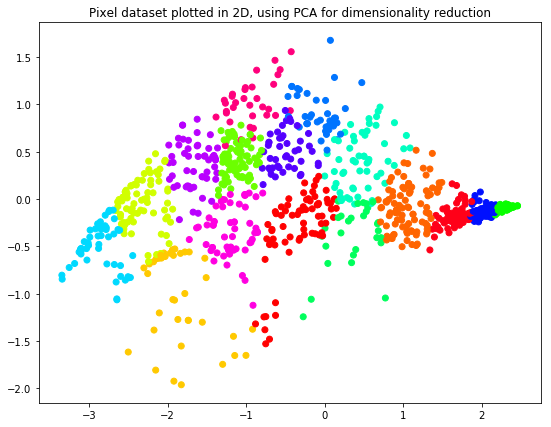

In [41]:
# Use PCA to project this cloud to 2D for visualization 
A_norm, mu, sigma = featureNormalize(A);

# PCA and project the data to 2D
U, S = pca(A_norm)
Z = projectData(A_norm, U, 2)

# Plot in 2D
plt.figure(figsize=(9,7))
plt.scatter(Z[sel,0], Z[sel,1], c=idx[sel].flatten(), cmap=plt.cm.hsv)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()